##  NLP- Bert Sentence Encoding



In [1]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
# bert_model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')

bert_model = SentenceTransformer('xlm-r-bert-base-nli-stsb-mean-tokens')

     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 1.8MB 13.8MB/s 
     |████████████████████████████████| 1.2MB 49.5MB/s 
     |████████████████████████████████| 890kB 20.8MB/s 
     |████████████████████████████████| 2.9MB 42.3MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp36-none-any.whl size=103068 sha256=a22a09d188d346b625b4f92070d4d7bf9f28ff96d8ad47c3c15cc9eaad272ddd
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=67f0f8dca3291a64ddeb538f385be347d69186dadbd9eadb1dd185591bee98f2
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


100%|██████████| 1.01G/1.01G [00:16<00:00, 63.1MB/s]


In [2]:
# # !pip install pytorch_transformers
# from pytorch_transformers import BertTokenizer, BertForSequenceClassification, BertConfig

# # tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
# model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased')


# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

# text = 'I liked that book very much!'
# tokenized_text = tokenizer.tokenize(text)
# print(tokenized_text)

# text_ids = tokenizer.convert_tokens_to_ids(tokenized_text)
# print('text ids:', text_ids)


## Preparing the dataset 

In [3]:
# #student_book (student, book)

# student_book = pd.read_csv('student_book.csv')
# student_book.head() 
# student_book.shape #(487, 983)
#book text embedding
# book= pd.read_csv('/content/drive/MyDrive/명륜이의 서재/DATA/1206_data/재영 부분/book_100000_196940(wo null).csv') #this is the data we crawled
# text_book = pd.read_csv('book.csv')
# text_book.shape 
# # book.head()
# text_book.head()

In [4]:
# #match the title and id 
# book = book[['book_id', 'subject']]
# book = book.drop_duplicates('book_id')
# book.head()#(66660, 2)
# text_book['title'] = book[:1000]['subject']
# text_book.head()
# text_book =text_book.drop_duplicates('book_id')
# text_book =text_book.reset_index(drop=True)
# text_book.head()
# text_book.iloc[815:]
# text_book= text_book.sort_values('book_id')
# text_book.head()
#needs reset of index 
# sentence_embeddings = bert_model.encode(text_book['title'])
# sentence_embeddings.shape #(6, 768) #this is the text embeddings for each book

#genre embedding 
# text_book =text_book.drop_duplicates('book_id')
# text_book= text_book.sort_values('book_id')
# text_book =text_book.reset_index(drop=True)
# genre =text_book[['book_id','ddc-sort']]
# genre.shape #(983, 2)
# genre = genre.set_index('book_id')
# genre.head()
# # genre['ddc-sort'].value_counts()
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# enc.fit(genre[['ddc-sort']])
# genre_initial= enc.transform(genre[['ddc-sort']]).toarray()
# genre_initial

## Start From Here! 


In [11]:
import pandas as pd

student = pd.read_csv('/content/drive/MyDrive/명륜이의 서재/FINAL_DATA/student_15.csv')
book = pd.read_csv('/content/drive/MyDrive/명륜이의 서재/FINAL_DATA/book_15.csv')
book.head()
student.shape
student

,student_id,major
0,412737,사과대학
1,572900,소프트웨어대학
2,991018,소프트웨어대학
3,1424110,사과대학
4,1520139,사과대학
...,...,...
22019,9998815280,자연과학대학
22020,9999050810,문과대학
22021,9999115980,경제대학
22022,9999486850,경영대학


In [19]:

input = pd.read_csv('/content/drive/MyDrive/명륜이의 서재/FINAL_DATA/new_input.csv')
# input['booklist']
input

,booklist,ddclist,major,pred,student_id
0,"[22234, 38591, 38927, 44301, 58994, 59239, 621...",[0 3 8 0 8 0 6 8 6 0 3 8 6 8 8 8 8 8],사과대학,109047.0,4.127370e+05
1,"[20164, 27532, 71562, 79470, 79607, 81349, 95259]",[0 8 1 8 8 1 3],소프트웨어대학,99850.0,5.729000e+05
2,"[1004, 1148, 1716, 4074, 4414, 4807, 5056, 996...",[8 1 8 5 5 5 1 6 8 5 8 0 5 1 5 1 5 3 5 9 1 3 8],소프트웨어대학,131493.0,9.910180e+05
3,"[41531, 45894, 54247, 56907, 73093, 90789]",[7 7 7 9 7 8],사과대학,128795.0,1.424110e+06
4,"[8604, 8605, 10238, 22870, 74592, 76788, 84120...",[3 3 2 8 1 9 1 8 5 8 8 8],사과대학,99339.0,1.520139e+06
...,...,...,...,...,...
21961,"[89054, 132301, 132920]",[6 5 5],자연과학대학,133068.0,9.998815e+09
21962,"[40374, 50908, 51382, 60217, 62372, 71278, 806...",[8 8 1 3 9 8 6 8 8 7 8 8 1],문과대학,106497.0,9.999051e+09
21963,"[23597, 49409, 63223, 72412, 72985, 73811, 738...",[7 7 8 9 0 6 6 5 3 3 9 6 3 3 7 6 6 5 3 0 0 0 6...,경제대학,118320.0,9.999116e+09
21964,"[8118, 16527, 21264, 23525, 26681, 42428, 4315...",[4 6 6 5 3 5 3 6 4 3 7 3 3 4 0 4 5 8 4 4 5 5 6...,경영대학,132796.0,9.999487e+09


### 1. Find the longest/average length for the books read for each student


문장의 최대 길이 : 6419
문장의 평균 길이 : 143.24028043339706


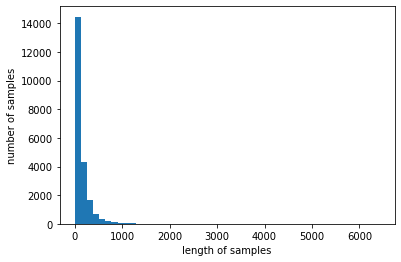

In [20]:

import matplotlib.pyplot as plt
%matplotlib inline

sequences = input['booklist']
# max_len = 55

print('문장의 최대 길이 :',max(len(l) for l in sequences)) #10 
print('문장의 평균 길이 :',sum(map(len, sequences))/len(sequences))

print('문장의 중앙값 길이 :',)
plt.hist([len(s) for s in sequences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 2. Change the y value to a new df where all the values are one-hot-encoded 


In [ ]:
from tensorflow.keras.utils import to_categorical
y = student[['pred']] #(252,)
train_y = pd.DataFrame(index=y.index,columns=range(0,983))
train_y.fillna(0, inplace=True)

for i in range(len(y)):
  # print(y.iloc[i,0])
  train_y.iloc[i,int(y.iloc[i,0])] = 1 


train_y.head()
# train_y.shape #(252, 983)

### 3. Make the book list into a list of lists + padd according to max_value

In [ ]:
books = student['booklist'].tolist()
type(books[0])
books
new=[]
from ast import literal_eval
for x in books:
  x = literal_eval(x)
  new.append(x)

new[:10]

NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_new = pad_sequences(new, maxlen = max_len)
pad_new.shape #(252, 55)

(252, 55)

### 4. Embedd the titles using bert - get the embeddings 

In [ ]:

# book.shape #(983, 5)
# book.head()
# sentence_embeddings = bert_model.encode(book['subject'])
# sentence_embeddings.shape #(983, 768)
sentence_embeddings[0]

array([-4.77335542e-01,  3.71796191e-01,  4.22544748e-01,  7.59998620e-01,
       -3.85853112e-01, -7.17986748e-02,  4.27637130e-01, -1.43503487e-01,
        2.13111416e-01, -4.03409362e-01,  1.65444076e-01,  3.80740166e-01,
        1.42300367e-01, -4.24716651e-01, -5.30597329e-01,  7.15721846e-01,
       -7.49361217e-01, -4.26458329e-01,  1.04344428e-01, -4.20641869e-01,
        2.94024169e-01, -4.12547678e-01,  1.95334524e-01,  1.18603818e-01,
        7.17893004e-01,  5.93436837e-01, -5.44176959e-02, -3.98434252e-01,
       -3.02409202e-01,  4.67815667e-01,  2.02830911e-01,  2.48822168e-01,
       -3.70882332e-01, -3.65570247e-01, -4.82681423e-01, -8.54683295e-03,
        4.74348456e-01,  5.52435398e-01,  3.30556184e-01,  1.55728921e-01,
        3.39899302e-01,  4.12307501e-01,  3.81828755e-01, -4.35026467e-01,
       -1.36849970e-01,  8.58883485e-02, -1.17381728e+00, -9.22385678e-02,
        7.37570301e-02, -3.23347092e-01, -5.13782680e-01,  2.82991510e-02,
        1.95974156e-01,  

### 5. Create the deep learning model using BERT 

In [ ]:
# sentence_embeddings[0]
#student_book

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten,BatchNormalization, Dropout, Reshape

model = Sequential()        #input = number of books #output dim = embedding shape  #input_length : max_len since sentence
genre_embeddings  = Embedding(input_dim = sentence_embeddings.shape[0], #983  
                              output_dim=sentence_embeddings.shape[1], #768
                              input_length= max_len, 
                              weights = [sentence_embeddings],trainable=True)
model.add(genre_embeddings)
model.add( Flatten() )
model.add(Dense(900, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(990, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(983, activation='softmax')) 
model.compile(optimizer='adam', loss='categorical_crossentropy',	metrics=["accuracy"])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 55, 768)           754944    
_________________________________________________________________
flatten_1 (Flatten)          (None, 42240)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 900)               38016900  
_________________________________________________________________
batch_normalization_2 (Batch (None, 900)               3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 900)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 990)               891990    
_________________________________________________________________
batch_normalization_3 (Batch (None, 990)              

In [ ]:
history = model.fit(pad_new,
                    train_y,
                    epochs=100,
                    batch_size=5)

Epoch 1/100
51/51 [==============================] - 2s 19ms/step - loss: 7.9187 - accuracy: 0.0000e+00
Epoch 2/100
51/51 [==============================] - 1s 19ms/step - loss: 7.1037 - accuracy: 0.0045
Epoch 3/100
51/51 [==============================] - 1s 19ms/step - loss: 6.2974 - accuracy: 0.0400
Epoch 4/100
51/51 [==============================] - 1s 19ms/step - loss: 5.6226 - accuracy: 0.0618
Epoch 5/100
51/51 [==============================] - 1s 19ms/step - loss: 5.1674 - accuracy: 0.0938
Epoch 6/100
51/51 [==============================] - 1s 22ms/step - loss: 4.2286 - accuracy: 0.1895
Epoch 7/100
51/51 [==============================] - 1s 19ms/step - loss: 3.8633 - accuracy: 0.2289
Epoch 8/100
51/51 [==============================] - 1s 19ms/step - loss: 3.3284 - accuracy: 0.2957
Epoch 9/100
51/51 [==============================] - 1s 19ms/step - loss: 3.0448 - accuracy: 0.3762
Epoch 10/100
51/51 [==============================] - 1s 19ms/step - loss: 2.3755 - accuracy: 0.

### 6. Test out the model (this case I used the training values, so its almost 100%)


In [ ]:
# model.evaluate(student_book.iloc[0], y.iloc[0])
yprob= model.predict(pad_new[:2])
yprob.argmax(axis=-1) #
model.predict_classes(pad_new[:2])
# yprob.shape #(2, 983)
# yprob

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([460, 835])

In [ ]:
train_y.iloc[:2, 460:] #460 predict 
train_y.iloc[:2, 830:] #835 predict

,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,...,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## cf) for visualization we need to make the embeddings with this formula


In [ ]:
#for visualization 
# Convert NumPy array of embedding into data frame
embedding_df = pd.DataFrame(sentence_embeddings)

# Save dataframe as as TSV file without any index and header
embedding_df.to_csv('output.tsv', sep='\t', index=None, header=None)
book.to_csv('metadata.tsv', index=False, sep='\t')